# Internet Advertisements Data Set

## Data Set Information:

This dataset represents a set of possible advertisements on Internet pages. The features encode the geometry of the image (if available) as well as phrases occuring in the URL, the image's URL and alt text, the anchor text, and words occuring near the anchor text. The task is to predict whether an image is an advertisement ("ad") or not ("nonad"). Additional information can be found [here](https://archive.ics.uci.edu/ml/datasets/internet%2Badvertisements).

## Attribute Information:

The dataset has 3 continous (height, width, aratio) and 1555 binary (urls, tags, captions) features.

## Source:

Creator & donor: Nicholas Kushmerick <nick '@' ucd.ie>

# Learning Objectives
- Identify and impute missing data
- Use normalization as part of the modeling process: min max normalization.
- Use normalization as part of the modeling process: centering and scaling.
- Use hold-out validation to compare the performance of a pair of models using a large data set.

In [1]:
import pandas as pd

# Load the data
internetAd = pd.read_csv('Internet_Ad_Data.csv', sep=',') # Removed error_bad_lines
print(internetAd.info())
internetAd.head(20)

<ipython-input-1-e58da535fcd4>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  internetAd = pd.read_csv('Internet_Ad_Data.csv', sep=',') # Removed error_bad_lines


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to Target
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None


,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


Question 1.1: Replace all the values of '   ?' with nan. And replace ad. with 1 and nonad. with 0

In [2]:
import numpy as np

internetAd = internetAd.replace({'nonad.': 0, 'ad.': 1})
#internetAd.head(11)
internetAd = internetAd.replace({'\?': np.NaN}, regex=True)
internetAd.head(11)


,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Question 1.1 Part 2: Check that replacing worked

In [3]:
# This funciton searches the entire dataframe for ANY data equal to the value param
internetAd[internetAd.eq('?').any(axis=1)] # Found 0 rows
internetAd[internetAd.eq('ad.').any(axis=1)] # found 0 rows
internetAd[internetAd.eq('nonad.').any(axis=1)] # found 0 rows

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target


Make Sure that "height","width","aratio" is type - float

In [4]:
# Convert those columns from Object to float64
internetAd[['height', 'width', 'aratio', 'local']] = internetAd[['height', 'width', 'aratio', 'local']].apply(pd.to_numeric)
internetAd.dtypes


height                float64
width                 float64
aratio                float64
local                 float64
url*images+buttons      int64
                       ...   
caption*here            int64
caption*click           int64
caption*for             int64
caption*you             int64
Target                  int64
Length: 1559, dtype: object

Question 1.2: Describe the statistics for each of the columns ["height","width","aratio","local"]

In [5]:
internetAd[['height','width','aratio','local']].describe()

,height,width,aratio,local
count,2376.000000,2378.000000,2369.000000,3264.000000
mean,64.021886,155.344828,3.911953,0.767157
std,54.868604,130.032350,6.042986,0.422708
min,1.000000,1.000000,0.001500,0.000000
25%,25.000000,80.000000,1.035700,1.000000
50%,51.000000,110.000000,2.102000,1.000000
75%,85.250000,184.000000,5.333300,1.000000
max,640.000000,640.000000,60.000000,1.000000


Question 2.1: Caluclate and display the (mean, median, mode) for each of the columns ["height","width","aratio","local"] as well as the overall statistics using describe method.

In [6]:
#Mean
internetAd.describe().loc[['mean']]

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
mean,64.021886,155.344828,3.911953,0.767157,0.00427,0.011589,0.004575,0.003355,0.003965,0.011589,...,0.004575,0.00366,0.00244,0.00305,0.006404,0.012809,0.013419,0.009759,0.001525,0.139982


In [7]:
#Median
internetAd.median()

height                 51.000
width                 110.000
aratio                  2.102
local                   1.000
url*images+buttons      0.000
                       ...   
caption*here            0.000
caption*click           0.000
caption*for             0.000
caption*you             0.000
Target                  0.000
Length: 1559, dtype: float64

In [8]:
#Mode
internetAd.mode()

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,60.0,468.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Question 2.2: Replace nan values for each of the ["height","width","aratio","local"] with the respective median value

In [9]:
meds = internetAd.median()
internetAd = internetAd.fillna(meds)

internetAd.isnull().sum()

height                0
width                 0
aratio                0
local                 0
url*images+buttons    0
                     ..
caption*here          0
caption*click         0
caption*for           0
caption*you           0
Target                0
Length: 1559, dtype: int64

Question 3.1: Plot the distribution of each of ["height","width","aratio","local"]

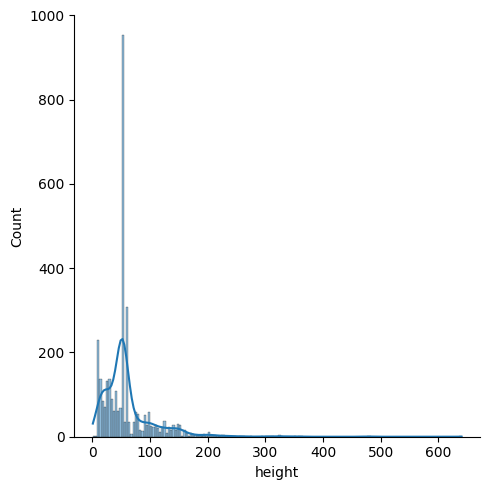

In [10]:
import seaborn as sns

# Histogram and Density Curve
sns.displot(internetAd['height'], kde=True)

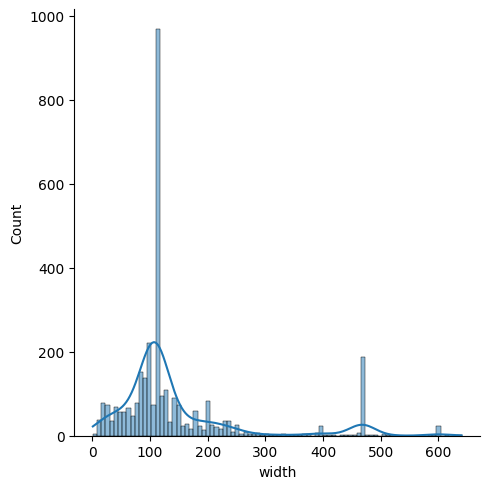

In [11]:
sns.displot(internetAd['width'], kde=True)

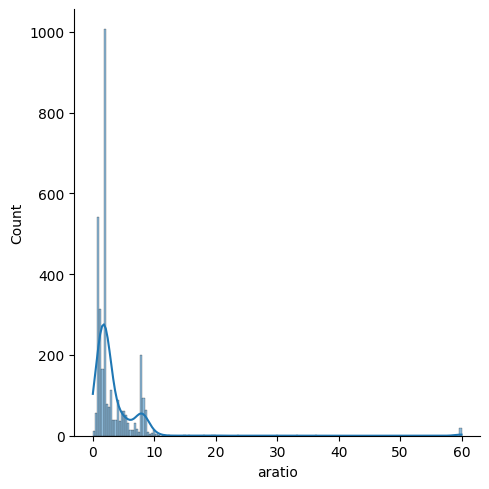

In [12]:
sns.displot(internetAd['aratio'], kde=True)

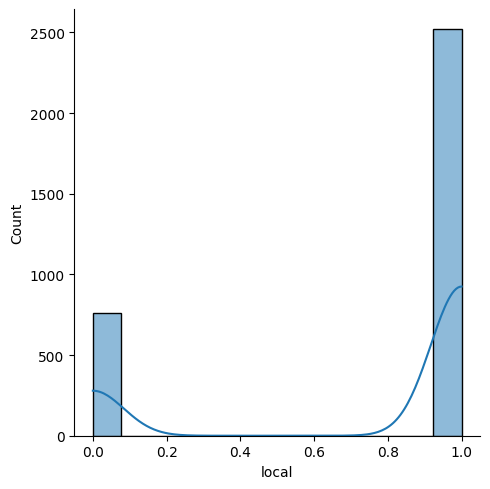

In [13]:
sns.displot(internetAd['local'], kde=True)

Question 3.2: You have noticed the wide variation across the different features. As a result, let's normalize the features using [MinMaxScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) method. Before we do that, we need to split the data into training and testing.

In [14]:
from sklearn.model_selection import train_test_split

#cols = ['height','width','aratio'] #'local']

X = internetAd.iloc[:,:-1] #cols] # We only scale the continuous variables, there doesn't seem to be a difference if we scale the binary ones (we can, but should we?)
y = internetAd.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
X_train_minmax_scaled = mmscaler.fit(X_train) # Do you need y_train scaled? Probably not since it's a binary ad or nonad
X_train_minmax_scaled = pd.DataFrame(X_train)#, columns=cols)
X_test_minmax_scaled = mmscaler.fit(X_test)
X_test_minmax_scaled = pd.DataFrame(X_test)#columns=cols)

#X_train_minmax_scaled.head()
X_train_minmax_scaled.describe()

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*of,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you
count,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.00000,2196.000000,2196.000000,2196.000000,...,2196.00000,2196.00000,2196.000000,2196.000000,2196.000000,2196.00000,2196.000000,2196.000000,2196.000000,2196.000000
mean,59.548270,140.871129,3.394454,0.776412,0.005009,0.012295,0.00592,0.003643,0.003188,0.012750,...,0.00592,0.00592,0.003643,0.001366,0.003188,0.00592,0.012295,0.012295,0.008652,0.001366
std,48.019642,111.641879,4.952541,0.416744,0.070614,0.110225,0.07673,0.060261,0.056382,0.112221,...,0.07673,0.07673,0.060261,0.036944,0.056382,0.07673,0.110225,0.110225,0.092634,0.036944
min,1.000000,1.000000,0.001500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,89.750000,1.302900,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,110.000000,2.102000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,140.000000,4.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,640.000000,640.000000,60.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Question 3.3: Lets build another training set where features are normalized using [StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [16]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
X_train_minmax_scaled = X_train.copy()
X_test_minmax_scaled = X_test.copy()

#fill this in
X_train_standard_scaled = sscaler.fit_transform(X_train_minmax_scaled)
X_test_standard_scaled = sscaler.fit_transform(X_test_minmax_scaled)
# Convert back to pandas dataframe for Logregr
X_train_standard_scaled = pd.DataFrame(X_train_standard_scaled)
X_test_standard_scaled = pd.DataFrame(X_test_standard_scaled)

X_train_standard_scaled.describe()



,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
count,2.196000e+03,2.196000e+03,2.196000e+03,2.196000e+03,2.196000e+03,2.196000e+03,2.196000e+03,2.196000e+03,2.196000e+03,2196.000000,...,2.196000e+03,2.196000e+03,2.196000e+03,2196.000000,2.196000e+03,2.196000e+03,2.196000e+03,2.196000e+03,2.196000e+03,2196.000000
mean,-9.706868e-18,-6.633026e-17,1.860483e-17,8.736181e-17,9.706868e-18,3.235623e-17,1.617811e-17,-4.206309e-17,6.471245e-18,0.000000,...,1.617811e-17,6.471245e-18,-2.750279e-17,0.000000,9.706868e-18,1.213358e-17,3.073842e-17,2.750279e-17,-2.588498e-17,0.000000
std,1.000228e+00,1.000228e+00,1.000228e+00,1.000228e+00,1.000228e+00,1.000228e+00,1.000228e+00,1.000228e+00,1.000228e+00,1.000228,...,1.000228e+00,1.000228e+00,1.000228e+00,1.000228,1.000228e+00,1.000228e+00,1.000228e+00,1.000228e+00,1.000228e+00,1.000228
min,-1.219534e+00,-1.253141e+00,-6.852497e-01,-1.863466e+00,-7.095298e-02,-1.115712e-01,-7.716934e-02,-6.046741e-02,-5.654916e-02,-0.113645,...,-7.716934e-02,-7.716934e-02,-6.046741e-02,-0.036986,-5.654916e-02,-7.716934e-02,-1.115712e-01,-1.115712e-01,-9.342166e-02,-0.036986
25%,-5.946477e-01,-4.580071e-01,-4.224156e-01,5.366345e-01,-7.095298e-02,-1.115712e-01,-7.716934e-02,-6.046741e-02,-5.654916e-02,-0.113645,...,-7.716934e-02,-7.716934e-02,-6.046741e-02,-0.036986,-5.654916e-02,-7.716934e-02,-1.115712e-01,-1.115712e-01,-9.342166e-02,-0.036986
50%,-1.780566e-01,-2.765822e-01,-2.610273e-01,5.366345e-01,-7.095298e-02,-1.115712e-01,-7.716934e-02,-6.046741e-02,-5.654916e-02,-0.113645,...,-7.716934e-02,-7.716934e-02,-6.046741e-02,-0.036986,-5.654916e-02,-7.716934e-02,-1.115712e-01,-1.115712e-01,-9.342166e-02,-0.036986
75%,9.409343e-03,-7.804667e-03,1.222976e-01,5.366345e-01,-7.095298e-02,-1.115712e-01,-7.716934e-02,-6.046741e-02,-5.654916e-02,-0.113645,...,-7.716934e-02,-7.716934e-02,-6.046741e-02,-0.036986,-5.654916e-02,-7.716934e-02,-1.115712e-01,-1.115712e-01,-9.342166e-02,-0.036986
max,1.209055e+01,4.471822e+00,1.143220e+01,5.366345e-01,1.409384e+01,8.962886e+00,1.295851e+01,1.653784e+01,1.768373e+01,8.799351,...,1.295851e+01,1.295851e+01,1.653784e+01,27.037012,1.768373e+01,1.295851e+01,8.962886e+00,8.962886e+00,1.070416e+01,27.037012


Question 4.1: Apply [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to the above minmax scaled dataset with class_weight='balanced', solver='saga', and max_iter=1000. Calculate Accuracy, Confusion Matrix, Precision, and Recall.


In [17]:
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000) # default is l2 penalty
logregr_model = logregr.fit(X_train_minmax_scaled, y_train)
minmax_preds = logregr_model.predict(X_test_minmax_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, minmax_preds))
print(classification_report(y_test, minmax_preds))



[[873  43]
 [ 46 121]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       916
           1       0.74      0.72      0.73       167

    accuracy                           0.92      1083
   macro avg       0.84      0.84      0.84      1083
weighted avg       0.92      0.92      0.92      1083



Question 4.2: Repeat question 4.1 setting penalty to {‘l1’,'l2', ‘elasticnet’}.
- Set C=0.1 for l1.
- Set l1_ratio=0.5 for elasticnet.

In [19]:
#penalty='l1'
logregr_l1 = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000, penalty='l1', C=0.1)
logregr_l1_model = logregr_l1.fit(X_train_minmax_scaled, y_train)
minmax_l1_preds = logregr_l1_model.predict(X_test_minmax_scaled)

print(confusion_matrix(y_test, minmax_l1_preds))
print(classification_report(y_test, minmax_l1_preds))

[[855  61]
 [ 55 112]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       916
           1       0.65      0.67      0.66       167

    accuracy                           0.89      1083
   macro avg       0.79      0.80      0.80      1083
weighted avg       0.89      0.89      0.89      1083



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [20]:
#penalty='elasticnet'
logregr_elasticnet = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000, penalty='elasticnet', l1_ratio=0.5)
logregr_elasticnet_model = logregr_elasticnet.fit(X_train_minmax_scaled, y_train)
minmax_elasticnet_preds = logregr_elasticnet_model.predict(X_test_minmax_scaled)

print(confusion_matrix(y_test, minmax_elasticnet_preds))
print(classification_report(y_test, minmax_elasticnet_preds))

[[873  43]
 [ 46 121]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       916
           1       0.74      0.72      0.73       167

    accuracy                           0.92      1083
   macro avg       0.84      0.84      0.84      1083
weighted avg       0.92      0.92      0.92      1083



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Question 5: How do the three models compare? How did you make the comparison?

# Analysis

Keep in mind I did receive a
```
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
```
error during calculation due to max_iter on Google colab. I upped the number to 10000 and completed the iteration for convergence during this analysis.


* The accuracy of the L1 target prediction (f1) is lower than the L2 and Elastic identifiers. Same for precision and recall on the positive classes.
* There are almost equal statistics for the L2 and Elastic penalty log regressions. In 1000 iterations there are a few more variations.
* There are more false positives and true negatives in the l1 prediction.
* All three hit the max_iter=1000 limit on Google Colab which may skew results (YMMV on other environments).
* The balanced L1 ratio in elasticnet (since it is balanced between l1/l2) might've led to similar results to the l2 penalty regression.



In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, minmax_preds)) #l2
print(accuracy_score(y_test, minmax_l1_preds)) #l1
print(accuracy_score(y_test, minmax_elasticnet_preds)) #elasticnet

0.9178208679593721
0.8928901200369345
0.9178208679593721


Question 6: Repeat steps 4.1-4.3 with the standard scaled dataset

In [22]:
#penalty='l2' l2 is also standard for this api
logregr_standard = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000, penalty='l2')
logregr_standard_model = logregr_standard.fit(X_train_standard_scaled, y_train)
standard_l2_preds = logregr_standard_model.predict(X_test_standard_scaled)

print("L2:\n")
print(confusion_matrix(y_test, standard_l2_preds))
print(classification_report(y_test, standard_l2_preds))
print(accuracy_score(y_test, standard_l2_preds))

#penalty='l1'
logregr_standard_l1 = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000, penalty='l1', C=0.1)
logregr_standard_l1_model = logregr_standard_l1.fit(X_train_standard_scaled, y_train)
standard_l1_preds = logregr_standard_l1_model.predict(X_test_standard_scaled)

print("L1:\n")
print(confusion_matrix(y_test, standard_l1_preds))
print(classification_report(y_test, standard_l1_preds))
print(accuracy_score(y_test, standard_l1_preds))

#penalty='elasticnet'
logregr_standard_elasticnet = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000, penalty='elasticnet', l1_ratio=0.5)
logregr_standard_elasticnet_model = logregr_standard_elasticnet.fit(X_train_standard_scaled, y_train)
standard_elasticnet_preds = logregr_standard_elasticnet_model.predict(X_test_standard_scaled)

print("L1:\n")
print(confusion_matrix(y_test, standard_elasticnet_preds))
print(classification_report(y_test, standard_elasticnet_preds))
print(accuracy_score(y_test, standard_elasticnet_preds))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


L2:

[[894  22]
 [ 17 150]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       916
           1       0.87      0.90      0.88       167

    accuracy                           0.96      1083
   macro avg       0.93      0.94      0.93      1083
weighted avg       0.96      0.96      0.96      1083

0.96398891966759


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


L1:

[[895  21]
 [ 17 150]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       916
           1       0.88      0.90      0.89       167

    accuracy                           0.96      1083
   macro avg       0.93      0.94      0.93      1083
weighted avg       0.97      0.96      0.97      1083

0.9649122807017544
L1:

[[892  24]
 [ 17 150]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       916
           1       0.86      0.90      0.88       167

    accuracy                           0.96      1083
   macro avg       0.92      0.94      0.93      1083
weighted avg       0.96      0.96      0.96      1083

0.9621421975992613


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
